# Marketing Analytics
## Nissan Infiniti Case study

## Case Question

Car manufacture Nissan planned to introduce the Infiniti G20 in the United States market, adding a third model to the existing Infiniti product line. Nissan's Infiniti division conducted a survey in its target segment to access the attidutes of consumers towards different brands and car models in the market. They surveyed each consumer and average their response to obtain a table with columns being each car model, and rows represnting each car attribute.


We simulate a situation where we help the manager in the Infiniti division to interpret the information in the survey that is not directly readable. We also provide him with a perceptual map that characterize model G20's position in the market relative to its competitors.

### Data preparation


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("data/car_position.csv", index_col=0)
df = df.transpose()
df = df.drop(["S1", "S2", "S3", "Overall"], axis=1)
df.describe()

attribute,Attractive,Quiet,Unreliable,Poorly Built,Interesting,Sporty,Uncomfortable,Roomy,Easy Service,Prestige,Common,Economical,Successful,AvantGarde,Poor Value
count,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,4.780000,4.410000,3.420000,3.090000,4.02000,4.830000,3.530000,4.140000,4.470000,4.720000,3.450000,4.030000,4.880000,4.170000,3.600000
std,0.777174,1.106998,0.795543,1.113004,0.70206,0.764562,0.692901,0.812677,0.503433,1.301964,0.745729,0.683211,0.771434,0.464399,0.590668
min,3.900000,2.800000,2.000000,1.600000,3.30000,3.800000,2.400000,3.300000,3.500000,2.800000,1.900000,3.100000,3.700000,3.600000,2.600000
25%,4.000000,3.525000,2.975000,2.225000,3.45000,4.150000,3.225000,3.600000,4.225000,3.575000,3.025000,3.600000,4.250000,3.750000,3.325000
50%,4.900000,4.500000,3.700000,2.800000,3.90000,4.900000,3.600000,3.900000,4.600000,5.000000,3.550000,4.000000,5.150000,4.200000,3.550000
75%,5.525000,5.150000,3.975000,4.275000,4.22500,5.175000,4.000000,4.275000,4.850000,5.550000,3.900000,4.525000,5.450000,4.475000,4.175000
max,5.700000,6.300000,4.300000,4.400000,5.40000,6.200000,4.400000,5.800000,5.000000,6.400000,4.300000,5.000000,5.900000,4.900000,4.300000


In questionnaires, marketing analyst may reverse code a question to test if the customers are paying attention to the questions. For example, insteading of asking how comfortable the cutomer feels, the question may be how uncomfortable the customer feels.

For these we (the analysts) reverse code them to the positive variation

In [ ]:
def reverse_code(value):
    return 10 - value #I assume the scale is from 1 to 10

columns_to_reverse_code = ['Unreliable', 'Poorly Built','Uncomfortable', 'Poor Value']
rename_dict = {'Unreliable': 'Reliable','Poorly Built' : 'Well Built', 'Uncomfortable' : 'Comfortable','Poor Value' : 'Good Value'}

df[columns_to_reverse_code] = df[columns_to_reverse_code].applymap(reverse_code)
df.rename(columns=rename_dict, inplace=True) #this effectively also deletes the original variables

In [ ]:
df.head(10)

attribute,Attractive,Quiet,Reliable,Well Built,Interesting,Sporty,Comfortable,Roomy,Easy Service,Prestige,Common,Economical,Successful,AvantGarde,Good Value
G20,5.6,6.3,7.1,8.4,3.6,4.1,6.8,4.2,4.6,6.4,3.5,3.6,5.3,4.3,6.6
Ford,4.0,3.6,5.8,5.8,5.0,4.9,6.0,3.9,4.9,3.5,3.6,3.7,4.2,3.6,5.7
Audi,4.6,5.2,6.3,7.4,4.0,3.8,7.6,5.3,3.5,5.6,3.4,3.6,5.0,3.6,5.7
Toyota,5.6,4.2,8.0,7.9,4.3,6.2,6.3,3.5,4.9,5.3,2.9,3.2,5.5,4.9,6.5
Eagle,4.0,3.5,5.7,5.7,3.9,4.9,6.0,3.6,4.6,2.8,4.3,4.9,3.7,4.4,6.4
Honda,5.2,5.4,6.8,7.2,3.4,5.1,6.7,3.9,5.0,4.7,3.9,5.0,5.6,3.9,7.4
Saab,5.3,4.8,6.3,7.2,3.4,4.3,7.5,5.8,3.8,5.4,1.9,4.3,5.3,4.7,7.1
Pontiac,3.9,2.8,6.1,5.6,5.4,5.7,5.7,3.3,4.7,3.8,4.3,3.1,4.4,4.1,5.7
BMW,5.7,5.0,7.7,8.2,3.3,4.1,6.5,4.3,4.1,6.4,2.8,4.3,5.9,3.7,6.7
Mercury,3.9,3.3,6.0,5.7,3.9,5.2,5.6,3.6,4.6,3.3,3.9,4.6,3.9,4.5,6.2


### Correlational analysis for the attributes with a heatmap.

In [ ]:
#I choose not to standardize the data for now
np.abs(df.corr()) #we notice here many coefficients higher than 0.5 in absolute value

attribute,Attractive,Quiet,Reliable,Well Built,Interesting,Sporty,Comfortable,Roomy,Easy Service,Prestige,Common,Economical,Successful,AvantGarde,Good Value
attribute,,,,,,,,,,,,,,,
Attractive,1.000000,0.791944,0.870881,0.954658,0.638617,0.247579,0.570304,0.360289,0.166416,0.888798,0.678674,0.055244,0.931456,0.176709,0.670464
Quiet,0.791944,1.000000,0.515015,0.866547,0.703684,0.627911,0.755140,0.531822,0.308432,0.830902,0.421956,0.086237,0.744491,0.150644,0.536975
Reliable,0.870881,0.515015,1.000000,0.844775,0.365251,0.090607,0.214469,0.027841,0.056596,0.755638,0.462605,0.252263,0.835719,0.184659,0.425621
Well Built,0.954658,0.866547,0.844775,1.000000,0.604616,0.392106,0.638686,0.407340,0.290904,0.956001,0.603080,0.164091,0.898352,0.032890,0.485064
Interesting,0.638617,0.703684,0.365251,0.604616,1.000000,0.541098,0.542242,0.484524,0.360268,0.515893,0.454167,0.645370,0.516172,0.130865,0.787747
Sporty,0.247579,0.627911,0.090607,0.392106,0.541098,1.000000,0.671366,0.744267,0.735822,0.499615,0.322524,0.216752,0.238118,0.475347,0.083653
Comfortable,0.570304,0.755140,0.214469,0.638686,0.542242,0.671366,1.000000,0.904115,0.719551,0.691695,0.639724,0.002582,0.601570,0.113603,0.342069
Roomy,0.360289,0.531822,0.027841,0.407340,0.484524,0.744267,0.904115,1.000000,0.849503,0.527372,0.722362,0.069641,0.387782,0.105398,0.224526
Easy Service,0.166416,0.308432,0.056596,0.290904,0.360268,0.735822,0.719551,0.849503,1.000000,0.448207,0.522372,0.022290,0.216291,0.176319,0.078468


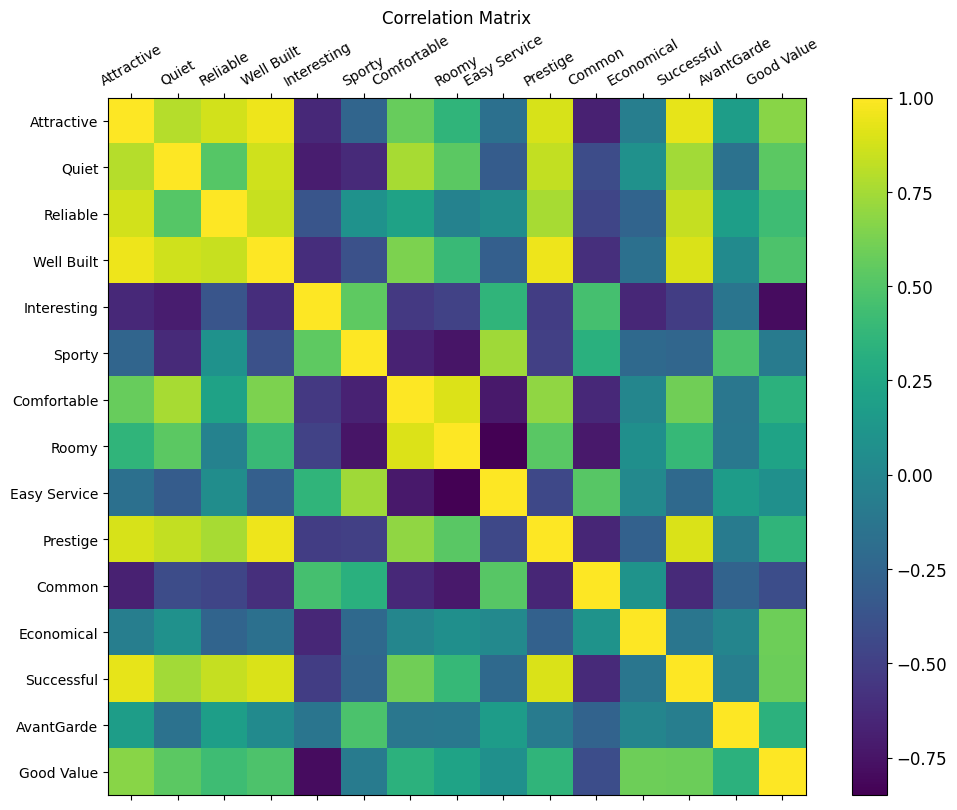

In [ ]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(12, 9))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=10, rotation=30)
plt.yticks(range(df.shape[1]), df.columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=12)
plt.title('Correlation Matrix', fontsize=12);
plt.show()

##We Remake the Correlation Matrix with absolute values to more easily judge the suitability for factor analysis


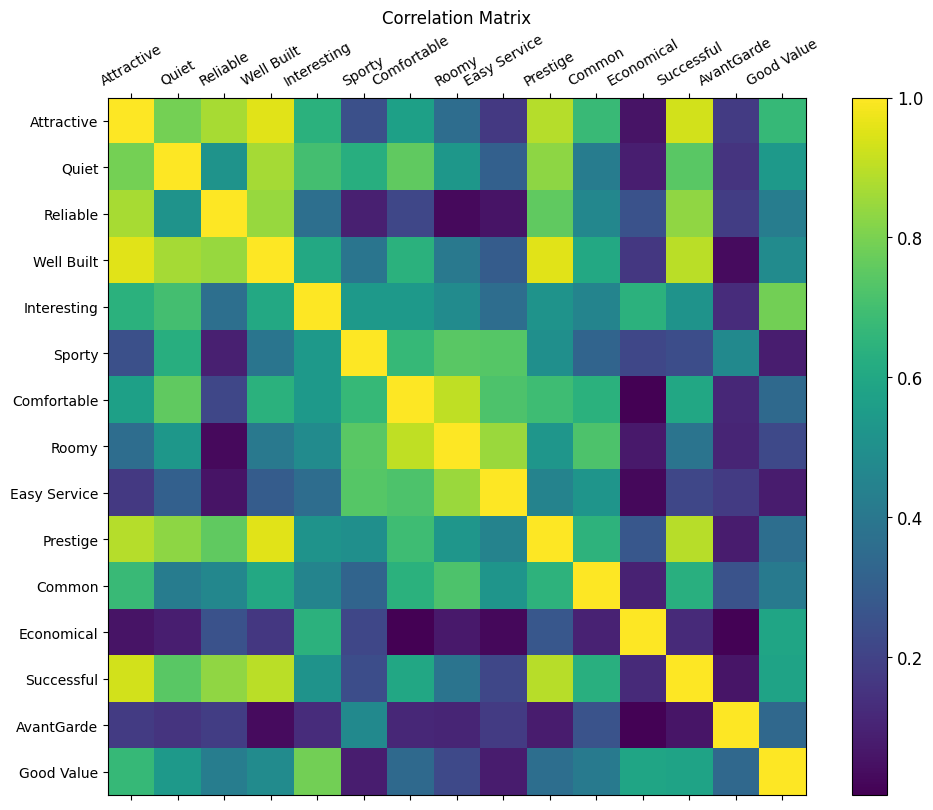

In [ ]:
f = plt.figure(figsize=(12, 9))
plt.matshow(np.abs(df.corr()), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=10, rotation=30)
plt.yticks(range(df.shape[1]), df.columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=12)
plt.title('Correlation Matrix', fontsize=12);
plt.show()

The Correlation Matrix shows that there are quite a few large (in absolute value) correlations. Some of the most easily observable are the correlations between Attractive, Well Built (reversed Poorly Built variable) and Successful.
Even looking at high negative correlations such as "Easy Service"<->"Roomy" implies the existance of some "factors" that could combine these attributes.
Hence I deem this dataset very suitable for factor analysis


### Performing factor analysis

In [ ]:
# load decomposition to do PCA analysis with sklearn
from sklearn import decomposition
import seaborn as sns

n_pc = 10 #we only have 10 samples so we cant get as many components as attributes (15)
pca = decomposition.PCA(n_components=n_pc)
pc = pca.fit_transform(df)

In [ ]:
# specify the name of the components
pc_name = ['PC' + str(item) for item in range(1,n_pc+1)]

# create a dataframe for better visualization
pc_df = pd.DataFrame(data = pc, columns = pc_name)
pc_df.head(10)
# pc_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-2.966517,0.334695,-0.049607,-1.107450,-0.416213,-0.606782,0.321299,0.175878,-0.007936,1.338182e-15
1,2.472645,-0.287877,-0.761708,-0.240649,-0.071452,0.403762,0.584657,-0.292947,0.008439,1.338182e-15
2,-1.527121,-1.611933,-1.370951,-0.550709,-0.064308,0.002481,-0.478596,-0.204038,0.052549,1.338182e-15
3,-1.012122,2.543571,-0.275091,0.879769,-0.249127,-0.191975,-0.163919,-0.277843,-0.001739,1.338182e-15
4,2.963808,-0.761769,1.099976,-0.119964,0.036261,-0.393334,-0.152182,-0.124051,-0.226790,1.338182e-15
5,-0.918535,0.230242,1.718831,-0.531679,-0.425989,0.726023,-0.162253,0.029374,0.057033,1.338182e-15
6,-2.016998,-1.550506,0.010161,1.669685,-0.283143,0.051891,0.158473,0.178560,-0.025303,1.338182e-15
7,3.133999,0.945542,-1.213623,-0.112926,-0.038009,0.251540,-0.167153,0.433484,-0.051044,1.338182e-15
8,-2.902173,0.395092,0.145897,-0.111386,1.154473,0.205173,0.072115,0.031131,-0.057691,1.338182e-15
9,2.773014,-0.237057,0.696113,0.225310,0.357505,-0.448780,-0.012440,0.050453,0.252483,1.338182e-15


### Determine number of factors

Looking into variance explained tables to judge

In [ ]:
# variance explained by each principal component
eigen_val = pca.explained_variance_
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
var_df = pd.DataFrame({'PC':pc_name, 'PC_num': range(1, n_pc+1),
                       'eigen_val':eigen_val, 'var_exp':var_exp, 'cum_var_exp':cum_var_exp})
var_df

,PC,PC_num,eigen_val,var_exp,cum_var_exp
0,PC1,1,6.433444e+00,6.401295e-01,0.640130
1,PC2,2,1.489632e+00,1.482188e-01,0.788348
2,PC3,3,9.645569e-01,9.597369e-02,0.884322
3,PC4,4,6.136085e-01,6.105422e-02,0.945376
4,PC5,5,2.188391e-01,2.177455e-02,0.967151
5,PC6,6,1.732615e-01,1.723957e-02,0.984390
6,PC7,7,8.987502e-02,8.942591e-03,0.993333
7,PC8,8,5.279306e-02,5.252924e-03,0.998586
8,PC9,9,1.421188e-02,1.414086e-03,1.000000
9,PC10,10,1.989702e-30,1.979759e-31,1.000000


   - Ploting variance explained and the cumulative variance explained by each factor.
   - Visulizing the scree plot that shows the eigenvalue of each factor

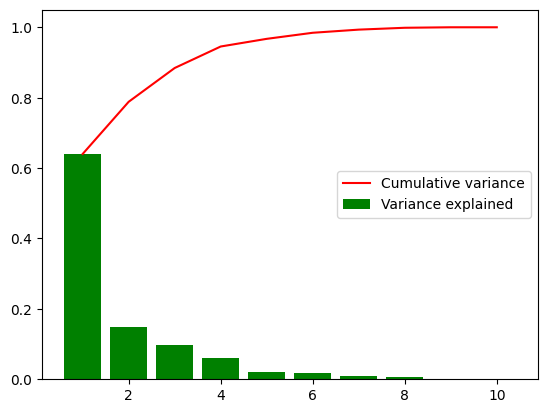

In [ ]:
# visulize the variance explained
fig = plt.figure()
ax = fig.gca()
ax.bar(var_df['PC_num'], var_df['var_exp'], color='g')
ax.plot(var_df['PC_num'], var_df['cum_var_exp'], color='r')
ax.legend(["Cumulative variance", "Variance explained"], loc='right')
# plt.savefig('var_exp.png')
plt.show()

Text(0.5, 1.0, 'Scree plot')

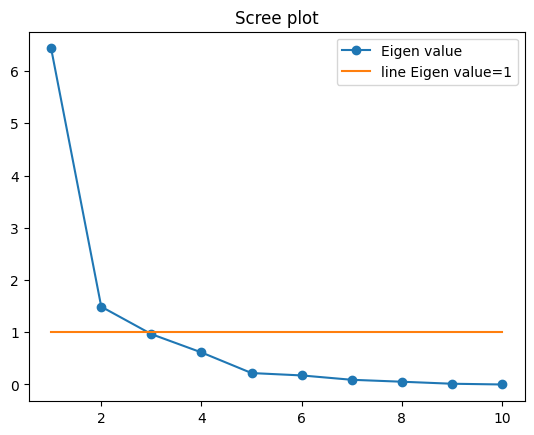

In [ ]:
plt.figure()
var_df['absline'] = 1
plt.plot(var_df['PC_num'], var_df['eigen_val'], "o-")
plt.plot(var_df['PC_num'], var_df['absline'])
plt.legend(["Eigen value", "line Eigen value=1"])
plt.title("Scree plot")
# plt.savefig('eigen.png')

#### Decision:

From the two plots it seems to me that for this data we can use 3 components only.
Every component with eigenvalue more than 1 “has more information that the average original raw attribute”. From this we can already pick the first 2, I decide to also add the 3rd one since it's eigenvalue is very close to 1 and including it we can reach over 88% cumulative variance explained

### Interpret the factors


In [ ]:
!pip install factor_analyzer

In [ ]:
from factor_analyzer import FactorAnalyzer

fa = FactorAnalyzer(n_factors=3, rotation="varimax", method='principal')
fa.fit(df)
ld = pd.DataFrame(fa.loadings_, columns=pc_name[0:3], index=df.columns)
ld_h = ld.transpose()
ld

,PC1,PC2,PC3
attribute,,,
Attractive,0.963508,-0.070987,0.241234
Quiet,0.715006,-0.426785,0.299909
Reliable,0.927552,0.255018,-0.016575
Well Built,0.947974,-0.218656,0.097108
Interesting,-0.444099,0.322708,-0.800181
Sporty,-0.126275,0.894012,-0.191520
Comfortable,0.505897,-0.759172,0.156919
Roomy,0.274116,-0.879592,0.163363
Easy Service,-0.128458,0.888490,0.030501


In [ ]:
fa.get_factor_variance()

(array([6.21691225, 3.87599486, 2.50954153]),
 array([0.41446082, 0.25839966, 0.16730277]),
 array([0.41446082, 0.67286047, 0.84016324]))

Use Visuals to interpet

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Attractive'),
  Text(1, 0, 'Quiet'),
  Text(2, 0, 'Reliable'),
  Text(3, 0, 'Well Built'),
  Text(4, 0, 'Interesting'),
  Text(5, 0, 'Sporty'),
  Text(6, 0, 'Comfortable'),
  Text(7, 0, 'Roomy'),
  Text(8, 0, 'Easy Service'),
  Text(9, 0, 'Prestige'),
  Text(10, 0, 'Common'),
  Text(11, 0, 'Economical'),
  Text(12, 0, 'Successful'),
  Text(13, 0, 'AvantGarde'),
  Text(14, 0, 'Good Value')])

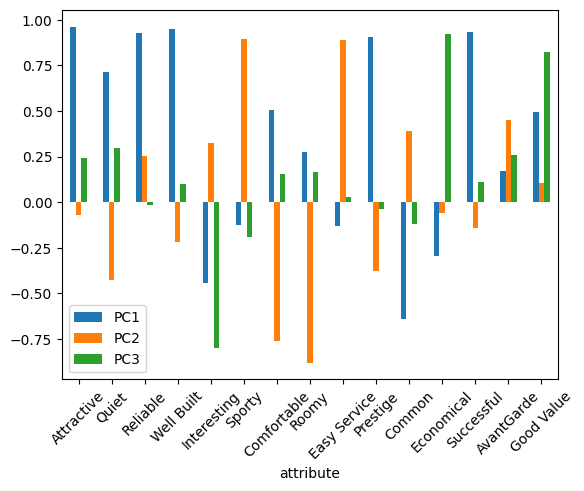

In [ ]:
ld.plot.bar()
plt.xticks(rotation=45)
# plt.savefig('loading.png')

In [ ]:
ld[(-0.5<ld) & (ld<0.5)] = 0
print(ld)

                   PC1       PC2       PC3
attribute                                 
Attractive    0.963508  0.000000  0.000000
Quiet         0.715006  0.000000  0.000000
Reliable      0.927552  0.000000  0.000000
Well Built    0.947974  0.000000  0.000000
Interesting   0.000000  0.000000 -0.800181
Sporty        0.000000  0.894012  0.000000
Comfortable   0.505897 -0.759172  0.000000
Roomy         0.000000 -0.879592  0.000000
Easy Service  0.000000  0.888490  0.000000
Prestige      0.905656  0.000000  0.000000
Common       -0.639032  0.000000  0.000000
Economical    0.000000  0.000000  0.922413
Successful    0.931647  0.000000  0.000000
AvantGarde    0.000000  0.000000  0.000000
Good Value    0.000000  0.000000  0.823441


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Attractive'),
  Text(1, 0, 'Quiet'),
  Text(2, 0, 'Reliable'),
  Text(3, 0, 'Well Built'),
  Text(4, 0, 'Interesting'),
  Text(5, 0, 'Sporty'),
  Text(6, 0, 'Comfortable'),
  Text(7, 0, 'Roomy'),
  Text(8, 0, 'Easy Service'),
  Text(9, 0, 'Prestige'),
  Text(10, 0, 'Common'),
  Text(11, 0, 'Economical'),
  Text(12, 0, 'Successful'),
  Text(13, 0, 'AvantGarde'),
  Text(14, 0, 'Good Value')])

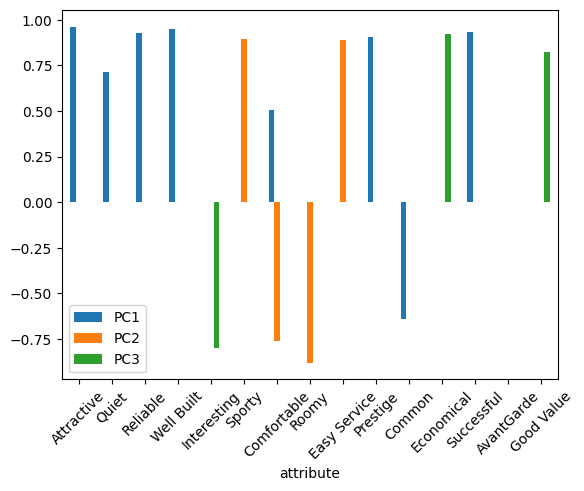

In [ ]:
ld.plot.bar()
plt.xticks(rotation=45)
# Plot after removing smaller loadings for a clear analysis of what is important

Here are my interpretations of the 3 factors

##Factor 1: Luxury

Attributes with high positive loadings: Attractive, Quiet, Reliable, Well Built, Prestige, Successful

Attributes with high negative loadings: Common

This factor represents perceptions of luxury, prestige, and quality in car brands. Customers who rate car brands highly on these attributes likely perceive them as luxurious, reliable, well-built, prestigious, and successful. The negative loading on "Common" suggests that brands perceived as common or ordinary tend to score lower on this factor.

##Factor 2: Performance

Attributes with high positive loadings: Sporty, Easy Service

Attributes with high negative loadings: Comfortable, Roomy

This factor reflects attributes related to performance and service in car brands. Brands with high positive loadings on "Sporty" and "Easy Service" may be perceived as offering high-performance vehicles and excellent service experiences. Conversely, brands with high negative loadings on "Comfortable" and "Roomy" may be seen as less focused on comfort and spaciousness but more on sportiness and efficient service.

##Factor 3: Economical Value

Attributes with high positive loadings: Good Value, Economical

Attributes with high negative loadings: Interesting

This factor captures perceptions of value and economy in car brands. Brands with high positive loadings on "Good Value" and "Economical" may be perceived as providing good value for money and being economically priced. The negative loading on "Interesting" suggests that brands perceived as less interesting tend to score higher on this factor, possibly indicating a focus on practicality and affordability over novelty or uniqueness in the car market.

### Visualize perceptual maps


In [ ]:
fa = FactorAnalyzer(n_factors=3, rotation="varimax", method='principal')
fa.fit(df)
ld = pd.DataFrame(fa.loadings_, columns=pc_name[0:3], index=df.columns)
ld_h = ld.transpose()

#Rerun the code to reset factor data (we removed the smaller values before!)

In [ ]:
# get factor scores
scores = fa.transform(df)
df_score = pd.DataFrame(scores, columns=["Luxury", "Performance","Economical Value"])
df_score.head(10)

,Luxury,Performance,Economical Value
0,1.112198,-0.141649,-0.044184
1,-0.973874,-0.041492,-1.012923
2,-0.050940,-2.071146,-0.981211
3,1.489145,1.651080,-0.720608
4,-1.465250,0.316072,1.042472
5,0.312163,0.586304,1.550633
6,0.399780,-1.208445,0.936662
7,-0.748199,0.761523,-1.635558
8,1.108698,-0.409692,0.241937
9,-1.183721,0.557444,0.622780


We make 3 maps since we have 3 factors

Text(0, 0.5, 'Performance')

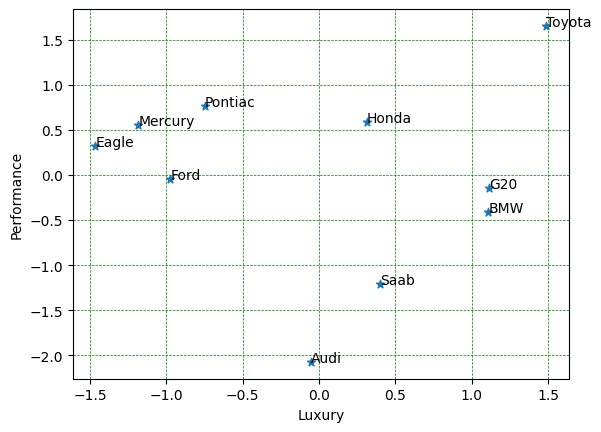

In [ ]:
fig, ax = plt.subplots()
ax.scatter(df_score["Luxury"], df_score["Performance"], marker='*')

for i, txt in enumerate(df.index):
    ax.annotate(txt, (df_score["Luxury"].tolist()[i], df_score["Performance"].tolist()[i]))

ax.grid(color='g', linestyle='--', linewidth=0.5)
ax.set_xlabel("Luxury")
ax.set_ylabel("Performance")
# fig.savefig('map.png')

Text(0, 0.5, 'Economical Value')

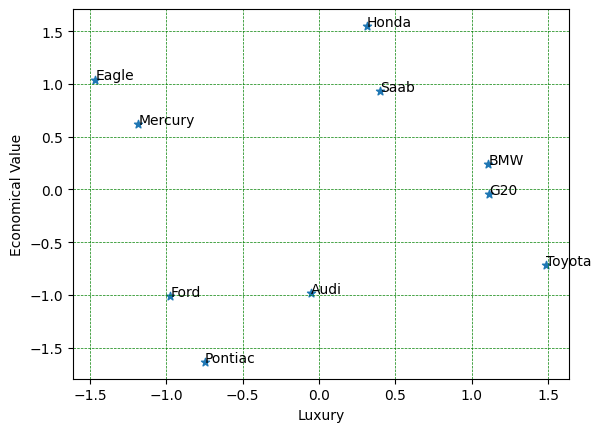

In [ ]:
fig, ax = plt.subplots()
ax.scatter(df_score["Luxury"], df_score["Economical Value"], marker='*')

for i, txt in enumerate(df.index):
    ax.annotate(txt, (df_score["Luxury"].tolist()[i], df_score["Economical Value"].tolist()[i]))

ax.grid(color='g', linestyle='--', linewidth=0.5)
ax.set_xlabel("Luxury")
ax.set_ylabel("Economical Value")
# fig.savefig('map.png')

Text(0, 0.5, 'Economical Value')

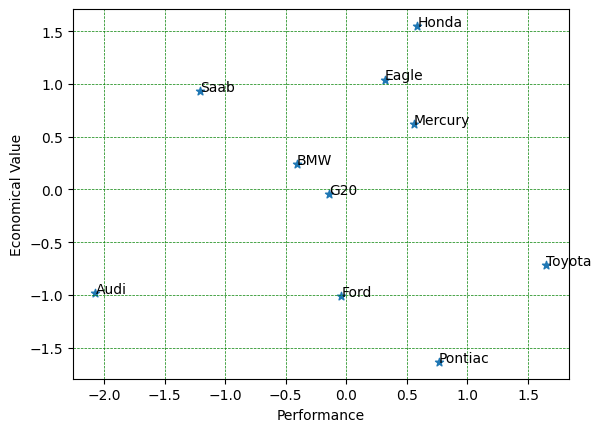

In [ ]:
fig, ax = plt.subplots()
ax.scatter(df_score["Performance"], df_score["Economical Value"], marker='*')

for i, txt in enumerate(df.index):
    ax.annotate(txt, (df_score["Performance"].tolist()[i], df_score["Economical Value"].tolist()[i]))

ax.grid(color='g', linestyle='--', linewidth=0.5)
ax.set_xlabel("Performance")
ax.set_ylabel("Economical Value")
# fig.savefig('map.png')

Let's find the closest competitors:

The most obvious competitor for the G20 is the BMW that is very close to the G20 in all 3 factors.

The next closest competitor would be the Saab. not nearly as close but when looking at the first and most important factor it is the closest aside from the BMW and Toyota. Toyota being much further on the axis of the second factor